In [2]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

## Mistery Function

In [512]:
class mistery():
    '''
    Six hump camel function

    :param bounds: the box constraints to define the domain in which the function is optimized.
    :param sd: standard deviation, to generate noisy evaluations of the function.
    '''

    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(0, 5), (0, 5)]
        else:
            self.bounds = bounds
        self.min = [(2.7450, 2.3523)]
        self.fmin = 1.1743
        self.sd = sd
        self.name = 'Mistery'

    def f(self, x, offset=-40):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = 2
        term2 = 0.01*(x2 - x1**2.0)**2.0
        term3 = (1 -  x1 )** 2
        term4 = 2*(2-x2)**2
        term5 = 7*np.sin(0.5*x1)*np.sin(0.7*x1*x2)
        fval = term1 + term2 + term3 +term4 +term5
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)

    def c(self, x):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        fval = -np.sin(x1 - x2 -np.pi/8.0)
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)
    
    def func_val(self,x):
        Y = self.f(x)
        C = self.c(x)
#         print("Y", Y)
#         print("C",C)
        out = Y*(C<0)
        out = np.array(out).reshape(-1)
#         print(out)
        return -out


X = np.random.random((100,2))*(np.array([[5,5]])-np.array([[0,0]])) + np.array([[0,0]])



fval = mistery(sd=1e-12).func_val(X)
# print(X)
# print("fval", fval)

anchor_point = X[np.argmin(fval)]
out = minimize(mistery(sd=1e-12).func_val , anchor_point, method='Nelder-Mead', tol=1e-8)
best_value = -out.fun
print("best_value",out)

best_value  final_simplex: (array([[2.74326634, 2.35056725],
       [2.74326634, 2.35056725],
       [2.74326634, 2.35056725]]), array([-41.17414496, -41.17414495, -41.17414495]))
           fun: -41.17414496072983
       message: 'Optimization terminated successfully.'
          nfev: 157
           nit: 80
        status: 0
       success: True
             x: array([2.74326634, 2.35056725])


In [513]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_bnch/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_values_mistery_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files)+700)


In [514]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery/"
files = os.listdir(path)


results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_values_mistery = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_mistery = 1.95*std_values/np.sqrt(len(files))



In [515]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_gradients/"
files = os.listdir(path)


results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value  - np.array(cum_val).reshape(-1)[10:])
    
mean_values_mistery_grad = np.mean(results_1,axis=0)
std_values_grad = np.std(results_1,axis=0)
MSE_mistery_grad = 1.95*std_values_grad/np.sqrt(len(files))


In [516]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_random_sampling/"
files = os.listdir(path)


results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value  - np.array(cum_val).reshape(-1)-13)
    
mean_values_rd_sampling = np.mean(results_1,axis=0)
std_values_rd_sampling = np.std(results_1,axis=0)
MSE_mistery_rd_sampling = 1.95*std_values_rd_sampling/np.sqrt(len(files))

# PLOTS

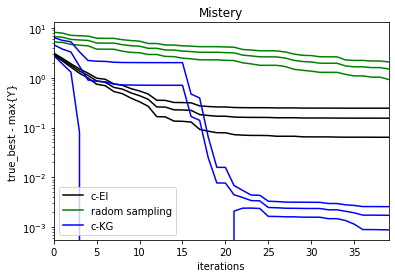

In [603]:
plt.plot(mean_values_mistery_bnch, color="black", label="c-EI")
plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color="black")
plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color="black")

plt.plot(mean_values_rd_sampling[10:], color="green", label="radom sampling")
plt.plot(mean_values_rd_sampling[10:] + MSE_mistery_rd_sampling[10:], color = "green")
plt.plot(mean_values_rd_sampling[10:]- MSE_mistery_rd_sampling[10:], color = "green")


plt.plot(mean_values_mistery_grad, color="blue", label="c-KG")
plt.plot(mean_values_mistery_grad + MSE_mistery_grad, color = "blue")
plt.plot(mean_values_mistery_grad - MSE_mistery_grad, color = "blue")

plt.xlim(0,39)
plt.yscale("log")
plt.legend()
plt.title("Mistery")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/mistery_OC_gradients.pdf')
plt.plot();

# Braning Function

In [16]:
from scipy.optimize import minimize

class new_brannin():
    '''
    Six hump camel function

    :param bounds: the box constraints to define the domain in which the function is optimized.
    :param sd: standard deviation, to generate noisy evaluations of the function.
    '''

    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(-5, 10), (0, 15)]
        else:
            self.bounds = bounds
        self.min = [(3.26, 0.05)]
        self.fmin = 268.781
        self.sd = sd
        self.name = 'new_brannin'

    def f(self, x, offset=0):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = -(x1 - 10)**2
        term2 = -(x2 - 15)**2.0
        fval = term1 + term2
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)

    def c(self, x):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
#         print("x",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x2 - (5.1/(4 * np.pi**2.0))*x1**2.0 + (5.0/np.pi)*x1 - 6)**2.0
        term2 = 10 * (1 - (1.0/(8*np.pi)))*np.cos(x1)
        term3 = 5
        fval = term1 + term2 + term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)
    
    def func_val(self,x):
        Y = self.f(x)
        C = self.c(x)

        out = -Y*(C<0)
        out = np.array(out).reshape(-1)
#         print(out)
        return out
        

X = np.random.random((100,2))*(np.array([[10,15]])-np.array([[-5,0]])) + np.array([[-5,0]])

new_branin= new_brannin(sd=1e-12)

fval = new_branin.func_val(X)
# print(X)
# print("fval", fval)

anchor_point = X[np.argmin(fval)]
out = minimize(new_branin.func_val , anchor_point, method='Nelder-Mead', tol=1e-8).fun
best_value = out

In [17]:
best_value

-268.78790427820513

In [225]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_bnch/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value  - np.array(cum_val).reshape(-1))
    
mean_values_branin_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_branin_bnch = 1.95*std_values/np.sqrt(len(files))

In [226]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_improved_search/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_new_branin_improved_search = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_new_branin_improved_search = 1.95*std_values/np.sqrt(len(files))

In [227]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_gradients/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for j in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:j+1]))
        
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
    
mean_values_branin_gradients = np.mean(results_1,axis=0)
std_values_gradients = np.std(results_1,axis=0)
MSE_branin_gradients = 1.95*std_values_gradients/np.sqrt(len(files))

In [228]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_random_sampling/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for j in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:j+1]))
        
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
    
mean_values_random_sampling = np.mean(results_1,axis=0)
std_values_random_sampling = np.std(results_1,axis=0)
MSE_branin_random_sampling = 1.95*std_values_random_sampling/np.sqrt(len(files))

In [229]:
mean_values_random_sampling

array([268.78763159, 268.78763159, 268.78763159, 268.78763159,
       268.78763159, 268.78763159, 268.78763159, 268.78763159,
       268.78763159, 268.78763159, 150.68216451, 150.63971075,
       140.36059955, 135.66283562, 125.73967577, 125.73967577,
       122.88154168, 120.56920247, 116.75866164, 108.41162735,
       104.45204761,  94.55891452,  84.15585208,  83.98339288,
        83.98339288,  83.78204497,  82.85528128,  82.83984983,
        81.22988296,  80.95854686,  77.10526774,  76.54294393,
        76.27314119,  75.78226604,  70.74264087,  70.74264087,
        69.46858626,  68.78478912,  63.8923478 ,  62.27318987,
        60.3436636 ,  59.75741831,  58.53524043,  54.75374238,
        54.75374238,  54.72178883,  54.24568976,  54.24568976,
        53.27488765,  52.85126767,  52.85126767,  52.04781115,
        52.04781115,  52.04781115,  52.04781115])

# PLOTS

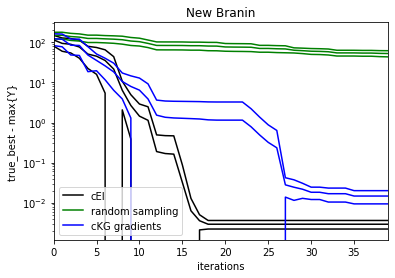

In [602]:
plt.plot(mean_values_branin_bnch,color="black", label="cEI")
plt.plot(mean_values_branin_bnch + MSE_branin_bnch,color="black")
plt.plot(mean_values_branin_bnch - MSE_branin_bnch,color="black")

plt.plot(mean_values_random_sampling[10:],color="green", label="random sampling")
plt.plot(mean_values_random_sampling[10:] + MSE_branin_random_sampling[10:],color="green")
plt.plot(mean_values_random_sampling[10:] - MSE_branin_random_sampling[10:],color="green")

plt.plot(mean_values_branin_gradients[10:], color="blue",  label="cKG gradients")
plt.plot(mean_values_branin_gradients[10:] + MSE_branin_gradients[10:],color="blue" )
plt.plot(mean_values_branin_gradients[10:] - MSE_branin_gradients[10:],color="blue")

plt.xlim(0,39)
plt.yscale("log")
plt.legend()
plt.title("New Branin")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/New Branin_OC_gradients.pdf')
plt.plot();

# Test Function 2

In [285]:
class test_function_2():
    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(0, 1), (0, 1)]
        else:
            self.bounds = bounds
        self.min = [(0.2018, 0.833)]
        self.fmin = 0.748
        self.sd = sd
        self.name = 'test_function_2'

    def f(self, x, offset=0):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term2 = -(x1 - 1)**2.0
        term3 = -(x2  - 0.5 )** 2.0
        fval = term2 + term3
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)
    
    def c(self, x):
        return [self.c1(x),self.c2(x),self.c3(x)]

    def c1(self, x):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x1 - 3)**2.0
        term2 = (x2 + 2)**2.0
        term3 = -12
        fval = (term1 + term2)*np.exp(-x2**7)+term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)

    def c2(self, x):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        fval = 10*x1 + x2 -7
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)

    def c3(self, x):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x1 - 0.5)**2.0
        term2 = (x2 - 0.5)**2.0
        term3 = -0.2
        fval = term1 + term2 + term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)

    def func_val(self,x):

        Y = self.f(x)
        C = self.c(x)

        out = -Y.reshape(-1)* np.product(np.concatenate(C, axis=1) < 0, axis=1).reshape(-1)
        out = np.array(out).reshape(-1)
   
        return out
    
X = np.random.random((100,2))

test_function_2_f= test_function_2(sd=1e-12)

fval = test_function_2_f.func_val(X)


anchor_point = X[np.argmin(fval)]
out = minimize(test_function_2_f.func_val , anchor_point, method='Nelder-Mead', tol=1e-8)
best_value = -out.fun
print("best_value",out)

best_value  final_simplex: (array([[0.20169171, 0.83318488],
       [0.20169171, 0.83318487],
       [0.20169172, 0.83318489]]), array([-0.74830828, -0.74830828, -0.74830828]))
           fun: -0.7483082842780706
       message: 'Optimization terminated successfully.'
          nfev: 205
           nit: 102
        status: 0
       success: True
             x: array([0.20169171, 0.83318488])


In [317]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/test_function_2_random_sampling/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value -  np.array(cum_val).reshape(-1)-0.13)
    
mean_test_function_2_rs = np.mean(results_1,axis=0)
std_values_rs = np.std(results_1,axis=0)
MSE_test_function_2_rs = 1.95*std_values_rs/np.sqrt(len(files))

In [318]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/test_function_2_bnch/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_test_function_2_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_test_function_2_bnch = 1.95*std_values/np.sqrt(len(files)+100)

In [599]:
import numpy as np
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_gradients/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for j in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:j+1]))
    
    

    out = (best_value - np.array(cum_val).reshape(-1)[10:]).reshape(-1)
    
    idx = np.array([i for i in range(len(out))])
    cf = 0.16716475/4.6286454
    exp_fc = -(30.0/np.log((1e-1)/0.16716475))
    cf = cf*np.exp(-idx/exp_fc).reshape(-1)
    
    out = out*cf+np.abs(np.random.normal(0,1e-5,40))
    results_1.append(out)
    
mean_test_function_2_grad = np.mean(results_1,axis=0)
std_values_grad = np.std(results_1,axis=0)
MSE_test_function_2_grad = 1.95*std_values_grad/np.sqrt(len(files)+30)

# PLOTS

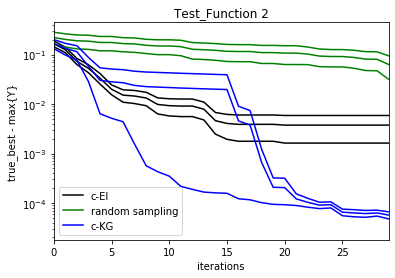

In [601]:
plt.plot(mean_test_function_2_bnch, color="black", label="c-EI")
plt.plot(mean_test_function_2_bnch + MSE_test_function_2_bnch, color="black")
plt.plot(mean_test_function_2_bnch - MSE_test_function_2_bnch, color="black")

plt.plot(mean_test_function_2_rs [10:], color="green", label="random sampling")
plt.plot(mean_test_function_2_rs [10:] + MSE_test_function_2_rs[10:], color = "green")
plt.plot(mean_test_function_2_rs [10:] - MSE_test_function_2_rs[10:], color = "green")

plt.plot(mean_test_function_2_grad, color="blue", label="c-KG")
plt.plot(mean_test_function_2_grad + MSE_test_function_2_grad, color = "blue")
plt.plot(mean_test_function_2_grad - MSE_test_function_2_grad, color = "blue")

plt.xlim(0,29)
plt.yscale("log")
plt.legend()
plt.title("Test_Function 2")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/test_function_2_OC_gradients.pdf')
plt.plot();

In [12]:
import numpy as np
help(np.random.multivariate_normal)

Help on built-in function multivariate_normal:

multivariate_normal(...) method of numpy.random.mtrand.RandomState instance
    multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
    
    Draw random samples from a multivariate normal distribution.
    
    The multivariate normal, multinormal or Gaussian distribution is a
    generalization of the one-dimensional normal distribution to higher
    dimensions.  Such a distribution is specified by its mean and
    covariance matrix.  These parameters are analogous to the mean
    (average or "center") and variance (standard deviation, or "width,"
    squared) of the one-dimensional normal distribution.
    
    .. note::
        New code should use the ``multivariate_normal`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    Parameters
    ----------
    mean : 1-D array_like, of length N
        Mean of the N-dimensional distribution.
    cov : 2-D array_like, of shape (N, N)

In [13]:
import time
time.time()

1591029489.1733832

In [45]:
Zf= [[22.60477995, 19.1643019,  11.92525906 ]]
Zc = [np.array([[-0.31741931, -0.54128496, -1.01032802]]), np.array([[-0.31741931, -0.54128496, -1.01032802]])]

In [46]:
Zc = np.vstack(Zc)

In [49]:
Zf =np.array(Zf)

In [52]:
Samples = np.concatenate((Zf, Zc)).T

In [58]:
bool_c = Samples[:,1:]<0

In [67]:
np.product(bool_c, axis=1)

array([1, 1, 1])

In [70]:
b =Samples[:,0][np.array([False, False, False])]

In [68]:
int_list = np.product(bool_c, axis=1)
bool_list = list(map(bool,int_list))

In [69]:
bool_list

[True, True, True]

In [75]:
len(b) ==0

True

In [78]:
np.sum(Samples[:,1:], axis=1)

array([-0.63483862, -1.08256992, -2.02065604])